<a href="https://colab.research.google.com/github/ibrahimshehin2017-sketch/my-professional-canvas/blob/main/Another_copy_of_machinelearning_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data collection
#preprocessing
#model processing
#model testing
#accuracy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Air_Quality.csv")
data.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2025-01-01 00:00:00+00:00,Brasilia,325.0,21.1,2.5,35.0,15.4,15.6,20.483337
1,2025-01-01 01:00:00+00:00,Brasilia,369.0,20.8,2.7,35.0,15.1,15.3,20.425000
2,2025-01-01 02:00:00+00:00,Brasilia,419.0,20.4,3.0,34.0,15.6,15.8,20.333332
3,2025-01-01 03:00:00+00:00,Brasilia,451.0,20.5,3.1,33.0,16.4,16.6,20.258335
4,2025-01-01 04:00:00+00:00,Brasilia,458.0,22.1,3.0,29.0,17.7,17.8,20.316668


In [ ]:
data.isnull().sum()
data=data.dropna()

In [ ]:
def calculate_aqi(pm25):
  if pm25<=30:
    return 50
  elif pm25<=60:
    return 100
  elif pm25<=90:
    return 200
  elif pm25<=120:
    return 300
  else:
     return 400
data['AQI']= data['PM2.5'].apply(calculate_aqi)


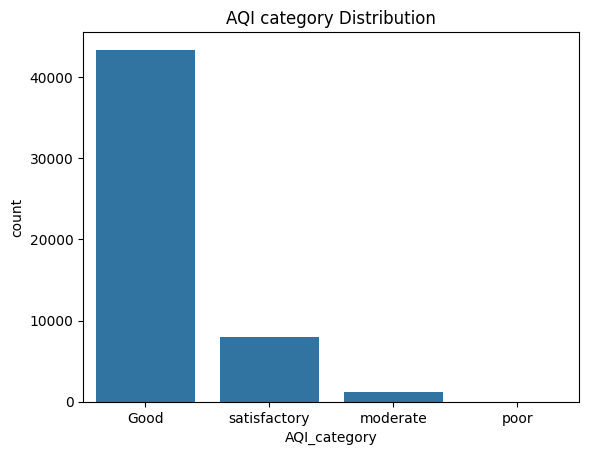

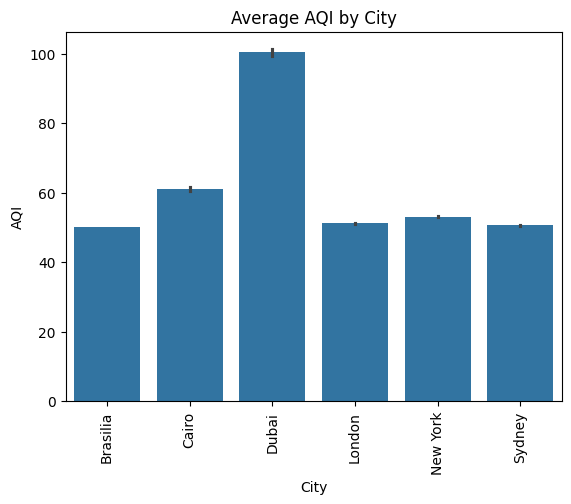

In [ ]:
def aqi_category(aqi):
      if aqi<=50:
        return "Good"
      elif aqi<=100:
          return "satisfactory"
      elif aqi<=200:
        return "moderate"
      elif aqi<=300:
        return "poor"
      else:
        return "verypoor"
data['AQI_category']=data['AQI'].apply(aqi_category)
sns.countplot(x='AQI_category', data=data)
plt.title("AQI category Distribution")
plt.show()

plt.figure()
sns.barplot(x='City',y='AQI',data=data) # Changed 'city' to 'City' assuming 'City' is the correct column name based on the data.head() output
plt.xticks(rotation=90)
plt.title("Average AQI by City")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=data[['PM2.5','PM10','NO2','SO2','CO']]
y=data['AQI']
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression ()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean squared error:",mse)

mean squared error: 195.38860868623038


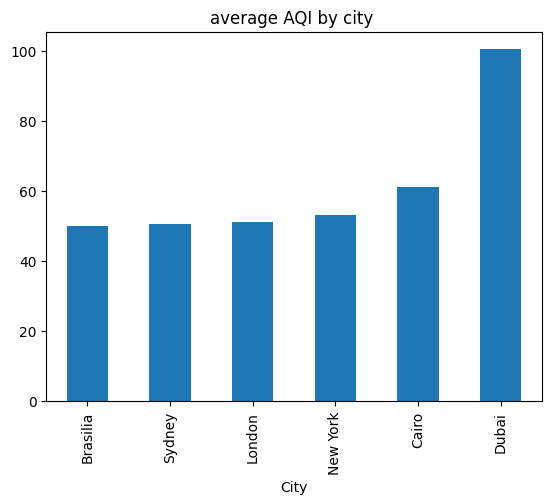

In [ ]:
city_aqi=data.groupby('City')["AQI"].mean()
city_aqi.sort_values().plot(kind='bar')
plt.title("average AQI by city ")
plt.show()